## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-0.31916368, -0.33609651],
       [ 0.43529547,  0.35225405],
       [ 0.56540295,  0.52032558],
       ...,
       [-1.29352503, -0.50205993],
       [ 0.60580569,  0.35475329],
       [ 1.7265635 , -1.90664881]], shape=(1000, 2))

In [5]:
y

array([-3.37438169e+01,  4.55778892e+01,  6.19089055e+01,  5.77640722e+01,
        2.41870985e+01, -2.13470305e+01, -7.06448604e+00, -2.10335085e+00,
       -4.37444049e+01, -1.88705403e+02,  9.20352754e+01, -8.49925658e+01,
       -8.59173121e+01,  2.66672498e+01, -5.89374291e+01,  7.07728164e+01,
        1.67752752e+02,  1.07364800e+02, -1.19420567e+02, -2.00420392e+01,
       -3.97856684e+01, -2.67725092e+01, -3.41757025e+00, -1.52940064e+02,
        9.79357143e+01,  5.54623638e+01, -9.18898653e+01, -6.85976442e+01,
       -5.11538073e+01, -9.22327120e+01, -1.14213320e+02,  3.17373063e+01,
       -2.02400236e+02, -3.57838073e+01, -4.21237618e+01, -3.92190045e+01,
        1.16999444e+02, -4.20483087e+01,  1.03888475e+02, -3.35717236e+01,
        5.59459604e+00, -1.06514525e+02, -1.22481287e+02, -8.01449005e+01,
       -5.71209353e+01, -9.98007220e+01,  4.24450556e+01,  6.94183041e+00,
        5.77329678e+01, -3.97714025e+01, -5.84409204e+00, -6.30458262e+01,
       -8.54596348e+01, -

In [6]:
pd.DataFrame(X)[0]

0     -0.319164
1      0.435295
2      0.565403
3      0.565188
4      1.253674
         ...   
995    1.794233
996    0.774455
997   -1.293525
998    0.605806
999    1.726563
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

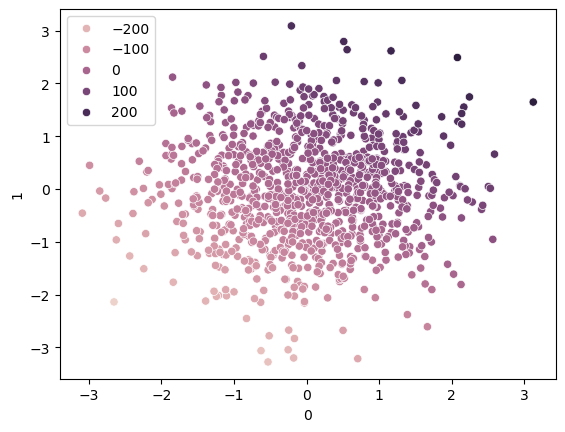

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [12]:
svr.coef_

array([[48.31978276, 63.07614394]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([  48.7058561 ,   68.60368376,  -41.1318825 ,   67.42995377,
       -129.40277373,  -64.58199935,  -58.74885285,  -18.27289863,
        -83.94097822, -118.93187213,   25.6250332 ,  -78.06158341,
        176.43372538,   51.19508045,   22.87161131,   32.20122523,
         75.71786281,  -11.43034981,  -59.66666158,    7.6950196 ,
         44.06637112,   60.84723314,  -94.36957635,   52.30148123,
         80.73533128,  166.927708  , -188.10801062,  -20.12750441,
         56.638963  ,   41.88058638,   59.81070723,   66.1083291 ,
        -32.28941905,   37.85963088,  -11.61712676, -200.16509294,
         87.52054498, -121.81989571, -122.84370362,  129.94336383,
        -27.02644641,  -18.9025532 ,  -33.7159196 ,  -41.09332123,
        129.89200607,  -29.32838162,  -80.98540047,    0.76062863,
        -22.51553122,  -40.66854504,  -70.44490232,    5.87428712,
       -223.35625441,  108.15737669,  -24.50469021,   19.99956631,
        -42.85930873,  -30.71683036,   82.23095789,    0.36751

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9984051420191138


##  Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.836 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.830 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.844 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.835 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.836 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.830 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.844 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.835 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'epsilon': [0.1, 0.2, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9984099412389256
